# Conway's Game of Life

Rules:

1. Any live cell with fewer than two live neighbors dies;
2. Any live cell with more than three live neighbords dies;
3. Any live cell with 2-3 neighbors survived;
4. Any dead cell with exactly 3 neighbors becomes a live cell;

In [365]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
side = 100
cells = np.random.randint(0,2,[side,side])
cells

array([[0, 0, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1]])

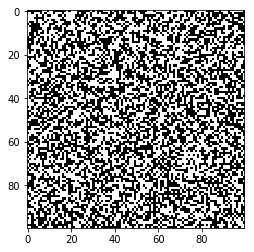

In [268]:
plt.imshow(cells, cmap = plt.cm.gray)

## Python implementation

In [269]:
def get_neighbors(cells):
    neighs = np.zeros(cells.shape) # make an array of neighbors
    rows, cols = cells.shape
    for row in range(rows):
        for col in range(cols):
            if row > 0:
                neighs[row,col] += cells[row-1,col]
            if row < rows-1:
                neighs[row,col] += cells[row+1,col]
            if col > 0:
                neighs[row,col] += cells[row,col-1]
            if col < cols-1:
                neighs[row,col] += cells[row,col+1]
            if row > 0 and col > 0:
                neighs[row,col] += cells[row-1,col-1]
            if row > 0 and col < cols-1:
                neighs[row,col] += cells[row-1,col+1]
            if row < rows-1 and col > 0:
                neighs[row,col] += cells[row+1,col-1]
            if row < rows-1 and col < cols-1:
                neighs[row,col] += cells[row+1,col+1]
    return neighs

get_neighbors(cells)

array([[ 2.,  2.,  2., ...,  2.,  1.,  1.],
       [ 3.,  4.,  5., ...,  4.,  2.,  1.],
       [ 5.,  7.,  6., ...,  2.,  2.,  2.],
       ..., 
       [ 3.,  3.,  3., ...,  6.,  6.,  4.],
       [ 4.,  4.,  3., ...,  6.,  6.,  4.],
       [ 1.,  1.,  1., ...,  4.,  4.,  3.]])

In [270]:
def apply_rules(cells):
    rows, cols = cells.shape 
    neighs = get_neighbors(cells) # make a copy
    for row in range(rows):
        for col in range(cols):
            if cells[row,col] == 1 and (neighs[row,col] > 3 or neighs[row,col] < 2):
                cells[row,col] = 0
            elif cells[row,col] == 0 and neighs[row,col] == 3:
                cells[row,col] = 1
    return cells

apply_rules(cells)

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [271]:
# measure how long it takes to simulate frames of 100x100 map
%timeit apply_rules(cells)

121 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## NumPy implementation

In NumPy, we will find the neighbors at once by using slicing

In [29]:
cells[1,:] # find North neighbors of the whole row

array([1, 1, 1])

In [31]:
cells[0,:] # North neighbors of cells[1,:]

array([1, 0, 0])

In [32]:
cells[1:,:]

array([[1, 1, 1],
       [0, 1, 0]])

In [34]:
cells[:-1,:]

array([[1, 0, 0],
       [1, 1, 1]])

### Dealing with boundaries

In [212]:
side = 3
matrix = np.zeros([side+2,side+2])
cells = matrix[1:-1,1:-1]
matrix[1:-1,1:-1] = np.random.randint(0,2,[side,side])
matrix

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [213]:
cells # show the cells

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

In [214]:
matrix[2:-1,1:-1] # North neighbors of

array([[ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

In [215]:
matrix[1:-2,1:-1]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [216]:
matrix[1:-1,1:-1] # cells

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

In [232]:
N = matrix[:-2,1:-1]+matrix[2:,1:-1]+matrix[1:-1,2:]+matrix[1:-1,:-2]+matrix[:-2,:-2]+matrix[2:,:-2]+matrix[2:,2:]+matrix[:-2,2:]
N

array([[ 0.,  1.,  1.],
       [ 2.,  4.,  2.],
       [ 1.,  3.,  2.]])

In [240]:
kill_cells = (N < 2) | (N > 3)
resurrect_cells = N == 3
cells = matrix[1:-1,1:-1]
cells[kill_cells] = 0
cells[resurrect_cells] = 1
cells

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  1.]])

In [241]:
def generate_matrix(side):
    matrix = np.zeros([side+2,side+2])
    matrix[1:-1,1:-1] = np.random.randint(0,2,[side,side])
    return matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Generate a movie

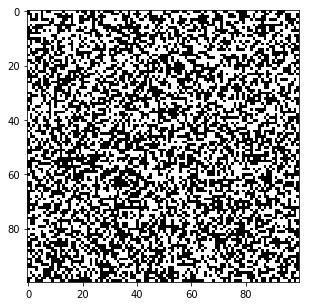

In [248]:
matrix = generate_matrix(100)
cells = matrix[1:-1,1:-1]

fig = plt.figure(figsize = (5,5))
im = plt.imshow(cells, cmap = plt.cm.gray)
plt.show()

In [280]:
def update(frame):
    global matrix
    global im
    N = matrix[:-2,1:-1]+matrix[2:,1:-1]+matrix[1:-1,2:]+matrix[1:-1,:-2]+matrix[:-2,:-2]+matrix[2:,:-2]+matrix[2:,2:]+matrix[:-2,2:]
    kill_cells = (N < 2) | (N > 3)
    resurrect_cells = N == 3
    cells = matrix[1:-1,1:-1]
    cells[kill_cells] = 0
    cells[resurrect_cells] = 1
    im.set_data(cells)

In [253]:
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, update, interval = 10, frames = 300)
anim.save('test.mp4', fps = 30)

In [254]:
# We will need this later

import io
import base64
from IPython.display import HTML

video = io.open('test.mp4','r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

## Time measurements

In [273]:
def _update(frame):
    global matrix
    N = matrix[:-2,1:-1]+matrix[2:,1:-1]+matrix[1:-1,2:]+matrix[1:-1,:-2]+matrix[:-2,:-2]+matrix[2:,:-2]+matrix[2:,2:]+matrix[:-2,2:]
    kill_cells = (N < 2) | (N > 3)
    resurrect_cells = N == 3
    cells = matrix[1:-1,1:-1]
    cells[kill_cells] = 0
    cells[resurrect_cells] = 1

matrix = generate_matrix(100)
%timeit _update(None)

337 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Escape from Tarkov

In [375]:
def update(frame):
    global matrix
    global im
    N = matrix[:-2,1:-1]+matrix[2:,1:-1]+matrix[1:-1,2:]+matrix[1:-1,:-2]+matrix[:-2,:-2]+matrix[2:,:-2]+matrix[2:,2:]+matrix[:-2,2:]
    kill_cells = (N < 2) | (N > 3)
    resurrect_cells = N == 3
    cells = matrix[1:-1,1:-1]
    cells[kill_cells] = 0
    cells[resurrect_cells] = 1
    im.set_data(cells)

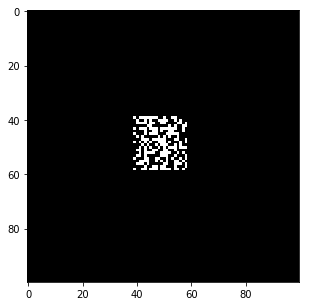

In [361]:
matrix = generate_matrix(100)
matrix[0:40,:] = 0
matrix[60:,:] = 0
matrix[:,:40] = 0
matrix[:,60:] = 0
cells = matrix[1:-1,1:-1]

fig = plt.figure(figsize = (5,5))
im = plt.imshow(cells, cmap = plt.cm.gray)
plt.show()

In [362]:
# We will need this later

import io
import base64
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, update, interval = 10, frames = 300)
anim.save('test.mp4', fps = 30)

video = io.open('test.mp4','r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

# Insert object function

In [368]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

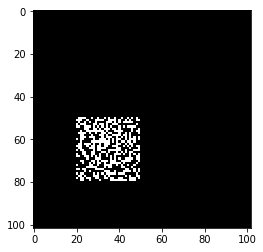

In [372]:
side = 100
matrix = np.zeros([side+2,side+2])

# matrix -- 2D array
# obj -- 2D array
# coords -- 1D array containing top-left coords
def insert_object(matrix, obj, coords):
    br_coords = coords + obj.shape
    matrix[coords[0]:br_coords[0],coords[1]:br_coords[1]] = obj
    return matrix

obj = np.random.randint(0,2,[30,30])
matrix = insert_object(matrix, obj, np.asarray([50,20]))
plt.imshow(matrix, cmap = plt.cm.gray)
plt.show()

In [ ]:
glider = np.asarray([[0,1,0],[1,0,0],[1,1,1]])

matrix = np.zeros([side+2,side+2])
matrix = insert_object(matrix, glider, np.asarray([50,50]))

plt.imshow(matrix, cmap = plt.cm.gray)
plt.show()

In [444]:
# The function will return a glider turned randomly
def get_glider():
    glider = np.asarray([[0,1,0],[1,0,0],[1,1,1]])
    for r in range(random.randint(0,3)):
        glider = np.rot90(glider)
        
    if random.randint(0,1):
        glider = np.transpose(glider)
    return glider

get_glider()

array([[0, 1, 1],
       [1, 0, 1],
       [0, 0, 1]])

In [377]:
import io
import base64
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig, update, interval = 10, frames = 300)
anim.save('test.mp4', fps = 30)

video = io.open('test.mp4','r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))